<a href="https://colab.research.google.com/github/Virtuoso633/DSML_Sem_4/blob/main/K_meansClusteringInDepthIntuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://drive.google.com/drive/folders/1wb9VL-F-Uk3oEO-AD7pRuKK0b09mqE1g?usp=drive_link).
The link contains Theory and Math UndertheHoodofAlgorithm..

```
# This is formatted as code
```



CONSTRUCTION OF A DATASET WITH IMPLICIT CLUSTERING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


1. `import numpy as np`: This imports the NumPy library and allows you to refer to it as `np` in your code.

2. `import matplotlib.pyplot as plt`: This imports the `pyplot` module from the Matplotlib library and allows you to refer to it as `plt` in your code. `pyplot` provides a MATLAB-like plotting interface.

3. `plt.rcParams['figure.dpi'] = 150`: This line sets the DPI (dots per inch) of the figure. Higher DPI values result in higher-resolution plots.

4. `N = 200`: This defines the total number of data points you want to generate.

5. `np.random.seed(42)`: This sets the random seed to ensure reproducibility. By setting the seed to a specific value (in this case, 42), you'll get the same random numbers every time you run the code.

6. Data Generation:
   - `c1`, `c2`, and `c3` are three clusters of random data points. Each cluster is generated using NumPy's `randn` function, which generates random numbers from a standard normal distribution (mean=0, standard deviation=1).
   - `N // 3` is used to ensure that each cluster contains roughly the same number of points. The double slash `//` is the floor division operator, which ensures the result is an integer.
   - The clusters are shifted using `np.array` to create separation between them.

7. `X = np.concatenate((c1, c2, c3))`: This concatenates the three clusters into a single array `X` containing all the data points.

8. `plt.scatter(X[:, 0], X[:, 1], s=10)`: This creates a scatter plot of the data points in `X`. `X[:, 0]` represents the x-coordinates of all points, and `X[:, 1]` represents the y-coordinates. The `s` parameter sets the size of the markers.

9. `plt.axis('equal')`: This ensures that the aspect ratio of the plot is equal, so the scale is the same on both the x and y axes.

10. `plt.show()`: This displays the plot. It's necessary to call this function to actually show the plot on the screen.

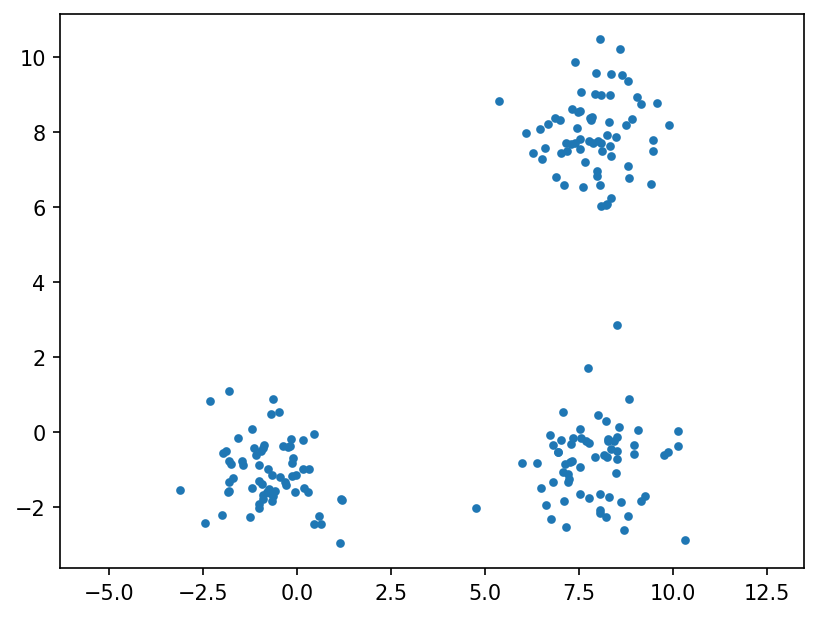

In [ ]:
plt.rcParams['figure.dpi'] = 150

N = 200 # defines the total number of data points you want to generate
np.random.seed(42)

c1 = np.random.randn(N// 3, 2) + np.array([8,8])
c2 = np.random.randn(N// 3, 2) + np.array([8,-1])
c3 = np.random.randn(N// 3, 2) + np.array([-1,-1])

X = np.concatenate((c1,c2,c3))
plt.scatter(X[:,0],X[:,1],s=10);
plt.axis('equal')
plt.show()

IS PCA Enough ??


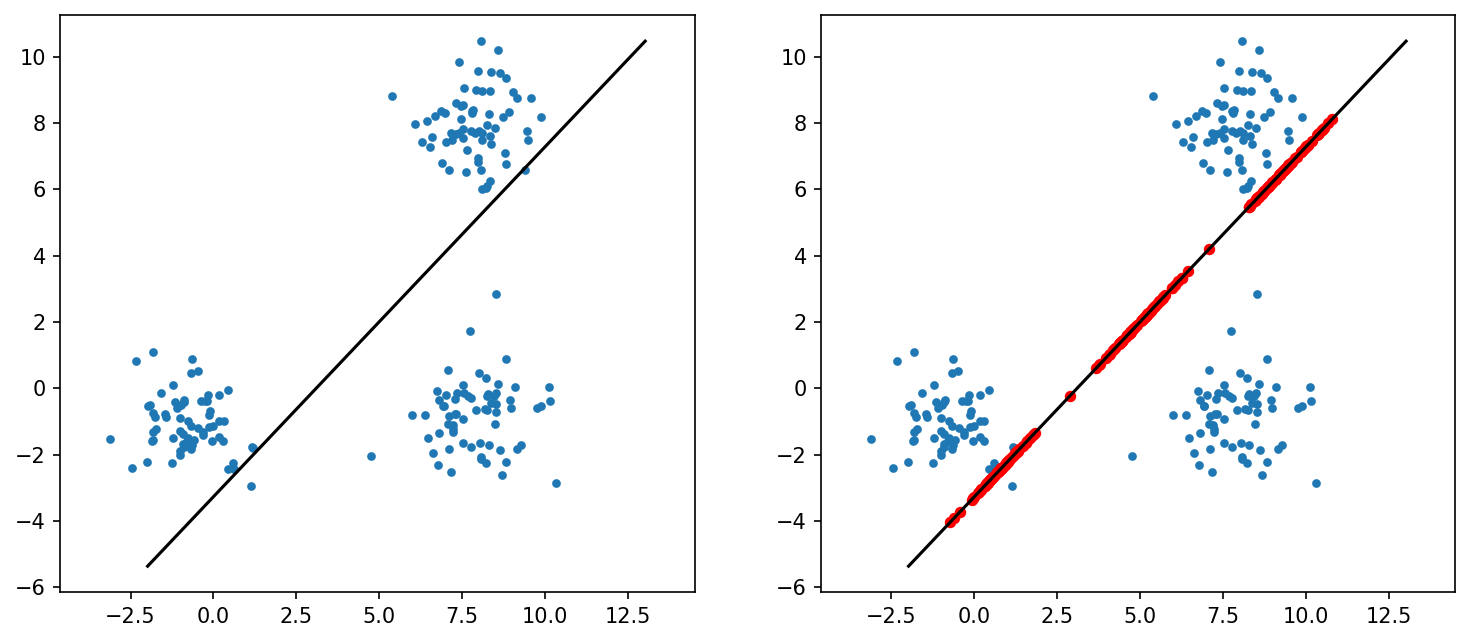

In [ ]:
# we would perform PCA on X

plt.figure(figsize = (12,5))

X_mean = X.mean(axis = 0)

X_centered = X - X_mean
cov_X = np.cov(X_centered.T)
eig_val,eig_vec = np.linalg.eigh(cov_X)
pc_vec = eig_vec[:,-1] / eig_vec[:,-1][0]
x_range = np.array([-7,8])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],s=10);
plt.axis('equal')
plt.plot(x_range + X_mean[0],x_range * pc_vec[1] + X_mean[1],color = "black")

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],s=10)
X_proj = np.array([i * eig_vec[:,-1] + X_mean for i in X_centered @ eig_vec[:,-1]])
plt.scatter(X_proj[:,0],X_proj[:,1],s=20,color='red')
plt.axis('equal')
plt.plot(x_range + X_mean[0],x_range * pc_vec[1] + X_mean[1], color='black')
plt.show()

objective function for kmeans clustering - Lloyd's Algorithm

In [ ]:
def objective_function(X,cluster_cernters):
  return sum([np.min([np.linalg.norm(x_i - cluster_center)**2 for cluster_center in cluster_centers]) for x_i in X])

Initialization Step

In [ ]:
n = 3
# cluster_centers = X[np.random.choice(len(X),3)]
cluster_centers = X[[70,85,80]]

Cluster Assignment Step

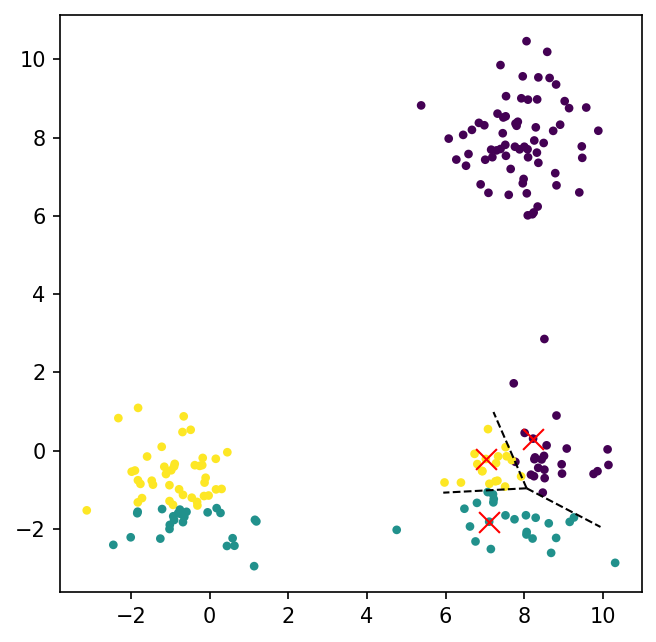

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def cluster_assignment(X,cluster_centers):
  z = np.zeros(X.shape[0])
  for i in range(X.shape[0]):
    z[i] = np.argmin([np.linalg.norm(X[i] - cluster_center) for cluster_center in cluster_centers])
  return z

z = cluster_assignment(X,cluster_centers)

fig,(ax) = plt.subplots(1,1)
fig.set_size_inches(5,5)

ax.scatter(X[:,0],X[:,1],c=z,s=10);
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = 'x', s = 100, color = 'red' , linewidth=1)

vor = Voronoi(cluster_centers)
voronoi_plot_2d(vor,ax=ax, show_points=False, show_vertices=False);

ax.axis('equal');

Recompute Means/Cluster Centers

In [ ]:
def recompute_clusters(X,z):
  cluster_centers = np.array([np.mean(X[z == i],axis = 0) for i in range(n)])
  return cluster_centers

Iteration of K-means

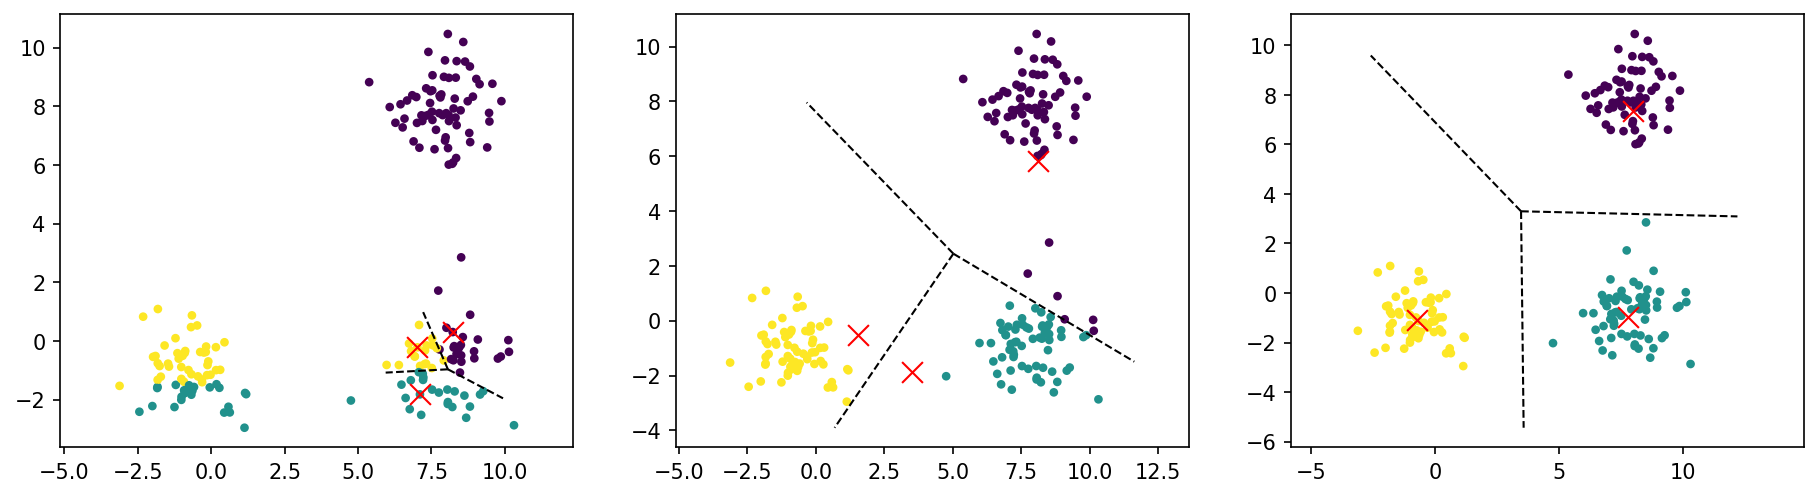

In [ ]:
fig,(ax) = plt.subplots(1,3)
fig.set_size_inches(15,3.75)

for i in range(3):

  z = cluster_assignment(X,cluster_centers) # cluster_centers --> NEW cluster assignment -->

  ax[i].scatter(X[:,0],X[:,1],c=z,s=10);
  ax[i].scatter(cluster_centers[:,0],cluster_centers[:,1],marker = 'x', s = 100, color = 'red' , linewidth=1)
  vor = Voronoi(cluster_centers)
  voronoi_plot_2d(vor,ax=ax[i], show_points=False, show_vertices=False)
  ax[i].axis('equal');

  cluster_centers = recompute_clusters(X,z) # cluster assignment --> NEW cluster center

Generate a complex dataset with 6 clusters

(-5.0, 5.0, -4.0, 5.0)

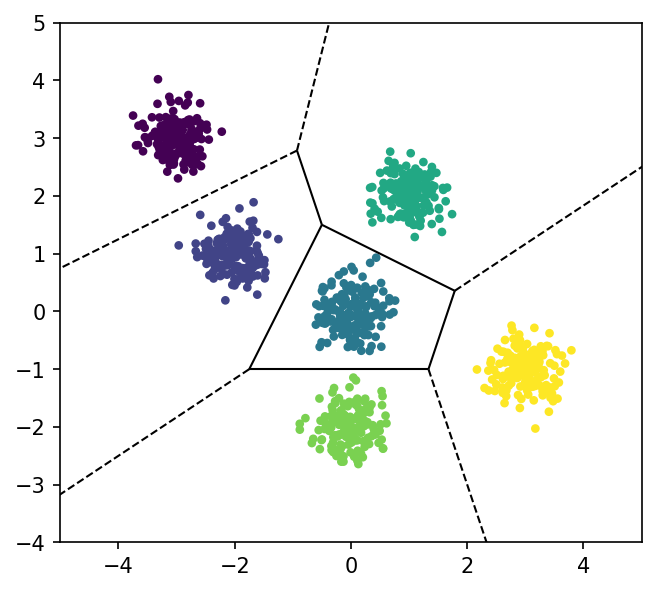

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs # convienient make_blobs generator from sckit_learn library

center = [(-3,3),(-2,1),(0,0),(1,2),(0,-2),(3,-1)]

X,ideal_z = make_blobs(n_samples= 1000, centers = center, n_features =2, cluster_std =0.3, random_state = 13, center_box=(-3,3))
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],s=10, c=ideal_z)
vor = Voronoi(center)
voronoi_plot_2d(vor,ax=ax,show_points=False,show_vertices=False);
fig.set_size_inches(5,4.5)
ax.axis([-5,5,-4,5])

In [ ]:
# # the make_blobs generator returns the optimal/good cluster assigment along with the dataset
# #the below method/function checks whether the result from lloyds is equivalent to the optimal assignment

# def ideal_check(ideal,obtained):
#   mapping = dict([(i,-1) for i in range(n)])

#   for i in range(len(ideal)):
#     if mapping [ideal[i]] == -1:
#       mapping[ideal[i]] = obtained[i]
#     elif mapping [ideal[i]] != obtained[i]:
#       return False
#   return True

In [ ]:
def ideal_check(ideal, obtained):
    mapping = dict([(i, -1) for i in set(ideal)])

    for i in range(len(ideal)):
        if mapping[ideal[i]] == -1:
            mapping[ideal[i]] = obtained[i]
        elif mapping[ideal[i]] != obtained[i]:
            return False
    return True


In [ ]:
from IPython.display import HTML
from matplotlib import animation

def lloyds_algo(cluster_centers,X,z,artists=[],animate=True,fig=None,ax=None,ax1 =None, n_iter =0, n= len(center)):
  loss = []
  if fig is None and animate:
    fig, (ax,ax1) = plt.subplots(1,2,figsize=(10,4.15))
    title = ax.set_title('')
    artists = []

  if animate:
    frame = []
    frame.append(ax.scatter(X[:,0],X[:,1],c=z,s=10))
    frame.append(ax.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = 'x',s=100, color ='red', linewidth=1))
    frame.append(ax.text(0.5,1.05,f'Iteration{n_iter} | Cluster Assignment', transform= ax.transAxes,ha ="center"))

    vor = Voronoi(cluster_centers)
    d = voronoi_plot_2d(vor,ax = ax ,show_points =False,show_vertices =False);
    frame += list(d.axes[0].lines[-1:]+ d.axes[0].collections[-2:])
    ax.axis([-5,5,-4,5])

    loss.append(objective_function(X,cluster_centers))
    m = 1
    frame.append(ax1.scatter([0],[loss[0]],color='red', marker ='x',s=30))
    frame.append(ax1.text(0.5,1.05,'Objective Fuction',transform = ax1.transAxes, ha="center"))
    frame.append(ax1.text(0.5,-0.1,"Iterations",transform = ax1.transAxes,ha="center"))

    artists.append(frame)

  converged = False
  while not converged:

    # cluster_centers = recompute_clusters(X,z)

    for i in range(n):
      cluster_points = X[z==i]
      if len(cluster_points) > 0:
        cluster_centers[i] = np.mean(cluster_points,axis=0)

    n_iter += 1

    #Modified cluster assignment step
    converged = True


    if animate:
      frame = []
      frame.append(ax.scatter(X[:,0],X[:,1],c=z,s=10))
      frame.append(ax.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = 'x',s=100, color ='red', linewidth=1))
      frame.append(ax.text(0.5,1.05,f'Iteration{n_iter} | Cluster Assignment', transform= ax.transAxes,ha ="center"))

      vor = Voronoi(cluster_centers)
      d = voronoi_plot_2d(vor,ax = ax ,show_points =False,show_vertices =False);
      frame += list(d.axes[0].lines[-1:]+ d.axes[0].collections[-2:])
      ax.axis([-5,5,-4,5])
      for i in range(0,len(loss)-1,2):
        frame.append(list(ax1.plot([i/2,(i+2)/2],[loss[i],loss[i+1]],color='red',marker='x',markersize=5))[0])

      loss.append(objective_function(X,cluster_centers))
      frame.append(list(ax1.plot([(len(loss)-2)/2,(len(loss)-1)/2],[loss[-2],loss[-1]],color="red",linestyle=":"))[0])
      frame.append(ax1.text(0.5,1.05,'Objective Fuction',transform = ax1.transAxes, ha="center"))
      frame.append(ax1.text(0.5,-0.1,"Iterations",transform = ax1.transAxes,ha="center"))

      artists.append(frame)


    for i in range(len(X)):
      z_i = np.argmin([np.linalg.norm(X[i] - cluster_center) for cluster_center in cluster_centers])

      if z_i != z[i]:
        z[i] = z_i
        converged = False

    if animate and not converged:
      frame = []
      frame.append(ax.scatter(X[:,0],X[:,1],c=z,s=10))
      frame.append(ax.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = 'x',s=100, color ='red', linewidth=1))
      frame.append(ax.text(0.5,1.05,f'Iteration{n_iter} | Cluster Assignment', transform= ax.transAxes,ha ="center"))

      vor = Voronoi(cluster_centers)
      d = voronoi_plot_2d(vor,ax = ax ,show_points =False,show_vertices =False);
      frame += list(d.axes[0].lines[-1:]+ d.axes[0].collections[-2:])
      ax.axis([-5,5,-4,5])

      loss.append(objective_function(X,cluster_centers))
      m = 1
      for i in range(0,len(loss) - 1,2):
        frame.append(list(ax1.plot([i/2,(i+2)/2],[loss[i],loss[i+1]],color="red", marker="x",markersize=5))[0])

      frame.append(ax1.text(0.5,1.05,'Objective Fuction',transform = ax1.transAxes, ha="center"))
      frame.append(ax1.text(0.5,-0.1,"Iterations",transform = ax1.transAxes,ha="center"))

      artists.append(frame)

  if animate:
    plt.close()
    return fig,(ax,ax1),cluster_centers,artists

  else:
    return cluster_centers, n_iter


Random Intialization


We now run LLOYDs algo with random initialization on Dataset . We use the "ideal_check" function to see wheather the obtained from lloyd's is optimal.




KeyboardInterrupt: 

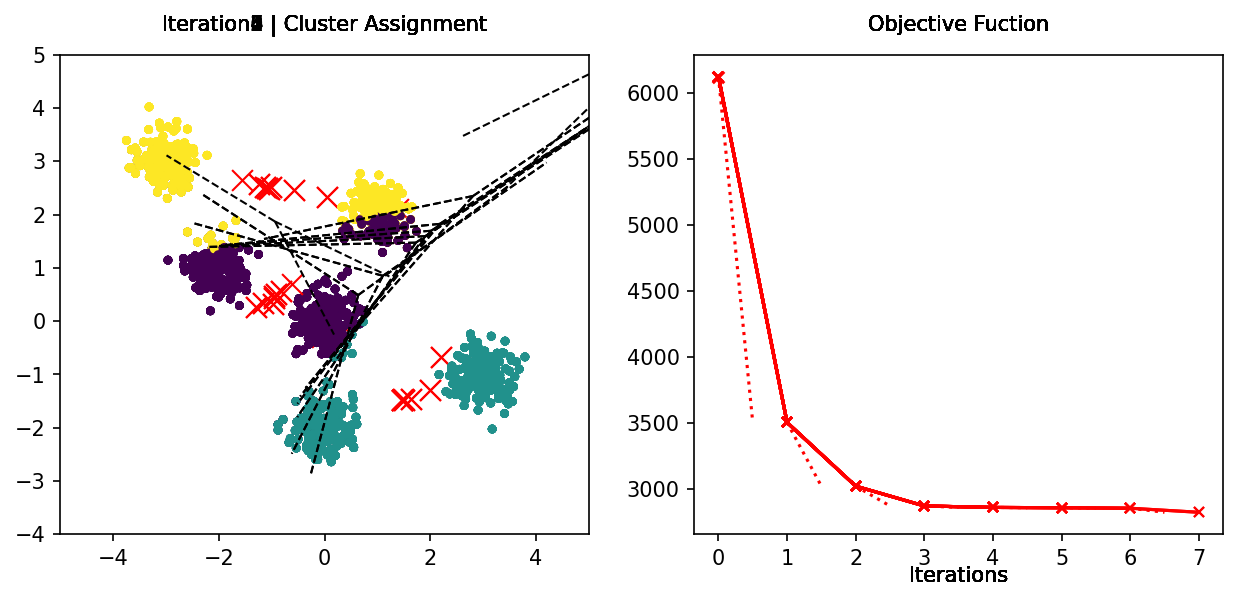

In [ ]:
cluster_centers = X[np.random.choice(len(X),n)]
z = cluster_assignment(X,cluster_centers)

fig,ax,final_clusters,artists = lloyds_algo(cluster_centers,X,z)

while not ideal_check(cluster_assignment(X,final_clusters), ideal_z):

  cluster_centers = X[np.random.choice(len(X),n)]
  z = cluster_assignment(X,cluster_centers)
  fig, ax ,final_clusters, artists = lloyds_algo(cluster_centers,X,z)


anim = animation.ArtistAnimation(fig,artists,interval = 500,repeat=False,blit=False);
HTML(anim.to_jshtml())

In [ ]:
cluster_centers = X[np.random.choice(len(X),n)]
z = cluster_assignment(X,cluster_centers)
fig, ax, final_clusters,artists = lloyds_algo(cluster_centers,X,z)

while ideal_check(cluster_assignment(X,final_clusters), ideal_z):
  cluster_centers = X[np.random.choice(len(X),n)]
  z = cluster_assignment(X,cluster_centers)
  fig, ax ,final_clusters, artists = lloyds_algo(cluster_centers,X,z)


anim = animation.ArtistAnimation(fig,artists,interval = 500,repeat=False,blit=False);
HTML(anim.to_jshtml())

Smart Initialization| k-means++

In [ ]:
def plusplus(animate=True,n = len(center)):
  initial_clusters = np.array(X[np.random.choice(len(X),1)])
  if animate:
    artists = []
    fig,(ax,ax1) = plt.subplots(1,2,figsize=(10,4.15),dpi = 150)

    a = ax.scatter(X[:,0],X[:,1],color='pink',s=10);
    b = ax.scatter(initial_clusters[:,0],initial_clusters[:,1],marker = 'x', s= 200, color = 'red', linewidth= 1);
    c = ax.text(0.5,1.05,f'K-Means ++',transform=ax.transAxes,ha="center")

    artists.append([a,c])

    c = ax.text(0.5,1.05,f'K-Means++ | Intialization 1',transform=ax.transAxes, ha= "center")
    artists.append([a,b,c])

  for i in range(1,n):
    #Rescore based on selected clusters
    scores = np.array([min([np.linalg.norm(datapoint-cluster)**2 for cluster in initial_clusters]) for datapoint in X])

    # Normalize scores to probability
    probabilities = scores/scores.sum()

    initial_clusters = np.append(initial_clusters,X[np.random.choice(len(X),1,p=probabilities)],axis=0)
    if animate:
      a = ax.scatter(X[:,0],X[:,1],color= "pink", s=10);
      b = ax.scatter(initial_clusters[:,0],initial_clusters[:,1],marker = 'x', s= 200, color = 'red', linewidth= 1);
      c = ax.text(0.5,1.05,f'K-Means++ | Intialization {i+1}',transform=ax.transAxes, ha= "center")

      artists.append([a,b,c])

  if animate:
    return fig,(ax, ax1) ,initial_clusters, artists

  return initial_clusters

In [ ]:
fig,(ax,ax1), cluster_centers,artists = plusplus()
z = cluster_assignment(X,cluster_centers)
fig, (ax,ax1), final_clusters, artists = lloyds_algo(cluster_centers,X,z,artists=artists,fig=fig,ax=ax,ax1=ax1)


while not ideal_check(cluster_assignment(X,final_clusters), ideal_z):
  fig,ax,cluster_centers,artists = plusplus()
  z = cluster_assignment(X,cluster_centers)
  fig, (ax,ax1),final_clusters, artists = lloyds_algo(cluster_centers,X,z,artists=artists,fig=fig,ax=ax,ax1=ax1)


anim = animation.ArtistAnimation(fig,artists,interval = 500,repeat=False,blit=False);
HTML(anim.to_jshtml())


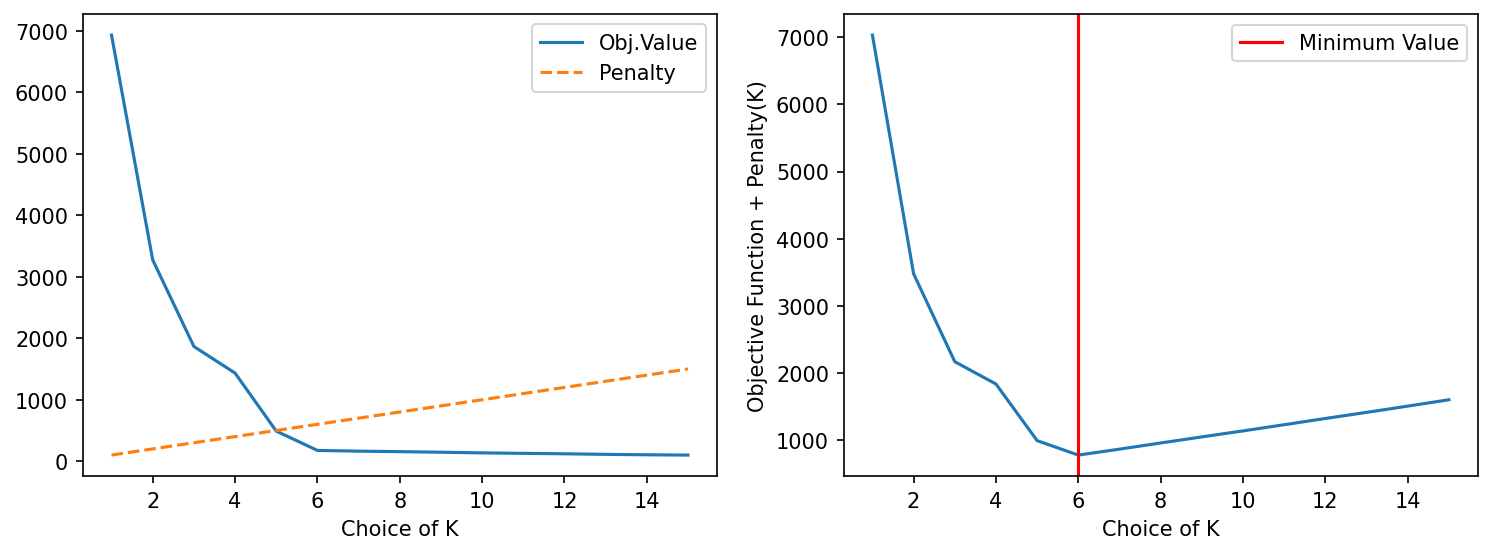

In [ ]:
K= list(range(1,16))
obj_vals = []
for k in K:
  obj_vals_k = []
  for _ in range(3):
    cluster_centers = plusplus(animate=False,n=k)
    cluster_centers,n_iter = lloyds_algo(cluster_centers,X, cluster_assignment(X,cluster_centers),animate=False,n=k)
    obj_vals_k.append(objective_function(X,cluster_centers))
  obj_vals.append(min(obj_vals_k))

penalties = [100*i for i in K]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K,obj_vals,label='Obj.Value')
plt.plot(K,penalties,linestyle='--',label='Penalty')
plt.xlabel('Choice of K')
plt.legend()

plt.subplot(1,2,2)
plt.plot(K,[penalties[i] + obj_vals[i] for i in range(15)])
plt.xlabel('Choice of K')
plt.ylabel('Objective Function + Penalty(K)')
plt.axvline(x=min(zip(K,[penalties[i] + obj_vals[i] for i in range(15)]),key=lambda i : i[1])[0],color='red',label='Minimum Value')
plt.legend()